<a href="https://colab.research.google.com/github/galik1999/Data-Visualization-Vinyl-Collection/blob/main/Vinyl_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import platform
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/vinyl_collection')
path = '/content/vinyl_collection/MyDrive/Vinyl Collection/Vinyl Collection db.db'

Mounted at /content/vinyl_collection


In [ ]:
# Create your connection.
cnx = sqlite3.connect(path)

In [ ]:
vinyls_df = pd.read_sql_query("SELECT * FROM Vinyls", cnx)
vinyls_df

,Vinyl Name,Artist Name,Release Year,Sound Quality Rating,Manufacturer,ID,Label
0,Houses of The Holy,Led Zeppelin,1973,8,Europe,8122796573,Atlantic
1,Led Zeppelin 3,Led Zeppelin,1970,8,Europe,8122796576,Atlantic
2,Led Zeppelin 4,Led Zeppelin,1971,8,Europe,8122796577,Atlantic
3,Led Zeppelin 2,Led Zeppelin,1969,8,Europe,8122796640,Atlantic
4,Led Zeppelin,Led Zeppelin,1969,8,Europe,8122796641,Atlantic
...,...,...,...,...,...,...,...
56,Honky Cat,Elton John,1987,6,USSR,C6026123006,Melodiya
57,Goodbye Yellow Brick Road,Elton John,1973,10,UK,DJLPD1001,DJM Records
58,A Tribute to Led Zeppelin,Beth Hart,2022,10,France,PRD76591,Provogue
59,Led Zeppelin Stairway to Heaven,Led Zeppelin,1988,6,USSR,C6027501005,Melodiya


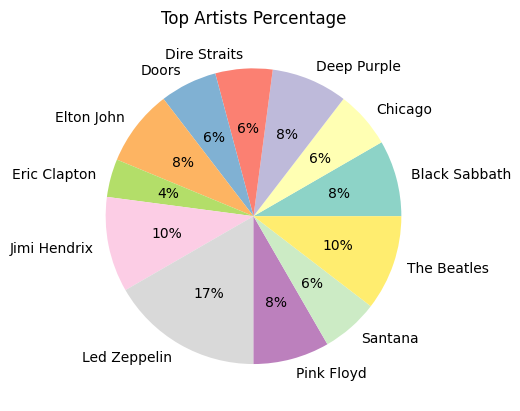

In [ ]:
artists_ser = vinyls_df.groupby(by = 'Artist Name').size()

data = artists_ser[artists_ser.values > 1]
keys = data.index

# define Seaborn color palette to use
palette_color = sns.color_palette('Set3')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Top Artists Percentage")
# displaying chart
plt.show()

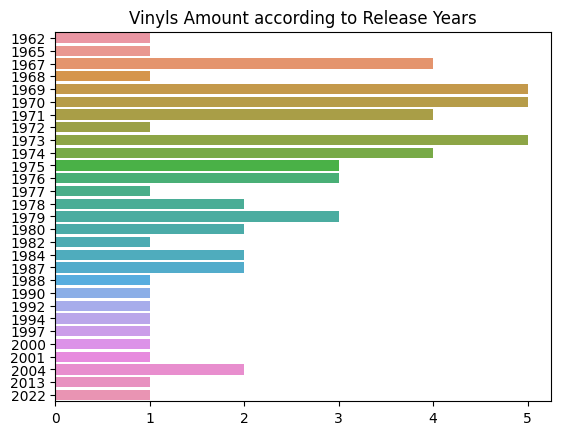

Most common years of realese are: 1969, 1970, 1973.
The vinyls from 1969 are:
Led Zeppelin 2, Led Zeppelin, Los Angeles Forum, Chicago Transit Authority, Green River.

The vinyls from 1970 are:
Led Zeppelin 3, Paranoid, Black Sabbath, Band of Gypsys, Let it Be.

The vinyls from 1973 are:
Houses of The Holy, The Beatles 1962-1966, Dark Side of the Moon, Goodbye Yellow Brick Road, Band on the Run.



In [ ]:
years_data_ser = vinyls_df['Release Year'].value_counts()
ax = sns.barplot(y=years_data_ser.index,x=years_data_ser.values,orient='h');
plt.title("Vinyls Amount according to Release Years")
plt.show()

top_years = years_data_ser[years_data_ser == 5]
top_years_list = top_years.index.to_list()
top_years_list.sort()
years_string = ", ".join(str(year) for year in top_years_list)
print("Most common years of realese are: {}.".format(years_string))
year_vinyl_map = {}
for year in top_years_list:
  year_vinyl_map[year] = [vinyl_name for vinyl_name in vinyls_df[vinyls_df['Release Year'] == year]['Vinyl Name'].values]

for year in year_vinyl_map.keys():
    vinyl_name_string = ", ".join(str(name) for name in year_vinyl_map[year])
    print("The vinyls from {} are:\n{}.\n".format(year,vinyl_name_string))

In [ ]:
total_amount = vinyls_df.shape[0]
print("The vinyl collection consists of {} vinyls.".format(total_amount))

The vinyl collection consists of 61 vinyls.


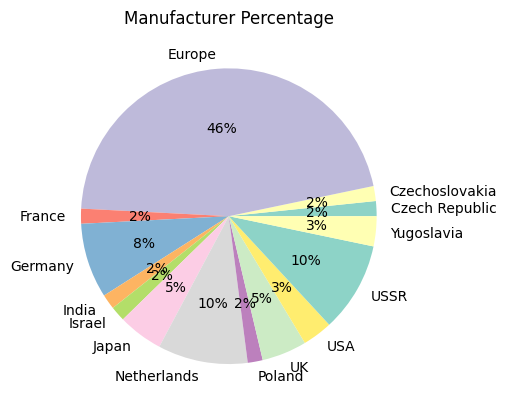

In [ ]:
manufacturers_ser = vinyls_df.groupby(by = 'Manufacturer').size()

data = manufacturers_ser
keys = data.index

# define Seaborn color palette to use
palette_color = sns.color_palette('Set3')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Manufacturer Percentage")
# displaying chart
plt.show();

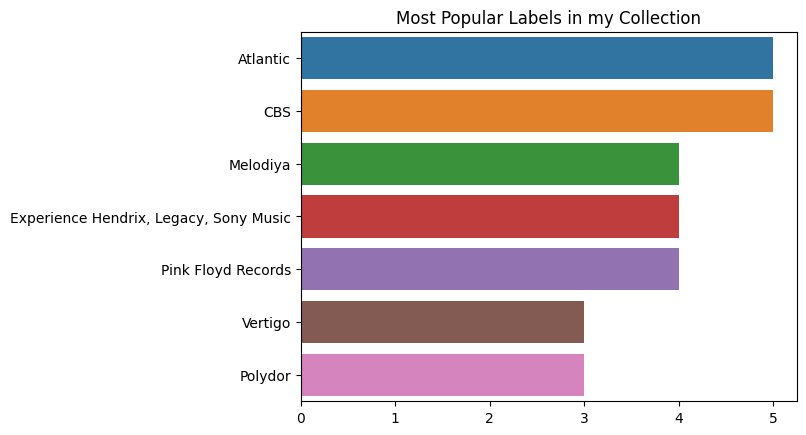

The Vinyls with label 'Atlantic' are:
Houses of The Holy by Led Zeppelin
Led Zeppelin 3 by Led Zeppelin
Led Zeppelin 4 by Led Zeppelin
Led Zeppelin 2 by Led Zeppelin
Led Zeppelin by Led Zeppelin

The Vinyls with label 'CBS' are:
The Beatles 1962-1966 by The Beatles
Moonflower by Santana
Chicago Transit Authority by Chicago
Marathon by Santana
Chicago X by Chicago

The Vinyls with label 'Melodiya' are:
Disco Alliance by Zodiac
Your Song by Elton John
Honky Cat by Elton John
Led Zeppelin Stairway to Heaven by Led Zeppelin

The Vinyls with label 'Experience Hendrix, Legacy, Sony Music' are:
Band of Gypsys by Jimi Hendrix
Blues by Jimi Hendrix
Are you Experienced by Jimi Hendrix
Los Angeles Forum by Jimi Hendrix

The Vinyls with label 'Pink Floyd Records' are:
Wish You Were Here by Pink Floyd
Dark Side of the Moon by Pink Floyd
The Wall by Pink Floyd
Live at Knebworth by Pink Floyd

The Vinyls with label 'Vertigo' are:
13 by Black Sabbath
Alchemy by Dire Straits
Communique by Dire Straits


In [ ]:
labels_value_counts = vinyls_df['Label'].value_counts()
labels = labels_value_counts[labels_value_counts >= 3]
sns.barplot(y=labels.index,x=labels.values,orient='h');
plt.title("Most Popular Labels in my Collection")
plt.show()

for label in labels.keys():
  vinyls_with_label = vinyls_df.loc[vinyls_df['Label'] == label][['Vinyl Name','Artist Name']]
  print("The Vinyls with label '{}' are:".format(label))
  for i in range(len(vinyls_with_label)):
    print(vinyls_with_label.iloc[i]['Vinyl Name'],'by',vinyls_with_label.iloc[i]['Artist Name'])
  print()

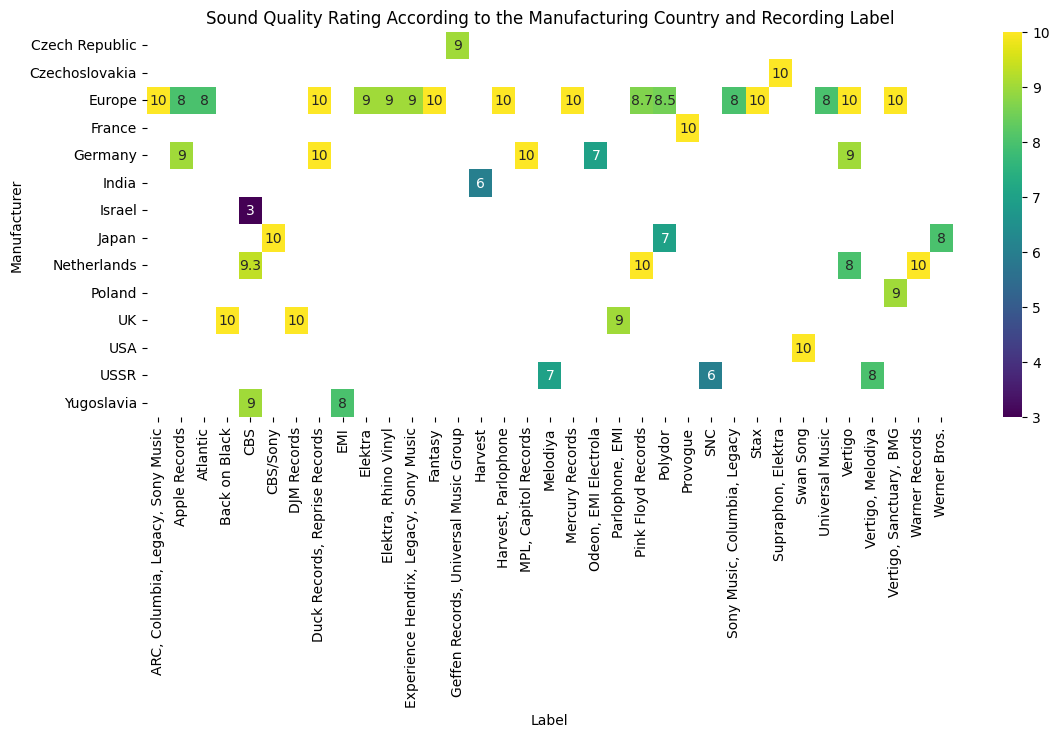

In [ ]:
label_manufacturer_rating_df = vinyls_df[['Label','Manufacturer','Sound Quality Rating']].groupby(by=['Manufacturer','Label']).mean()
label_manufacturer_rating_df.reset_index(inplace = True)
plot_data = label_manufacturer_rating_df.pivot(index="Manufacturer", columns="Label", values="Sound Quality Rating")
plt.figure(figsize=(13,5))
plt.title('Sound Quality Rating According to the Manufacturing Country and Recording Label')
sns.heatmap(plot_data,annot = True,cmap = 'viridis');

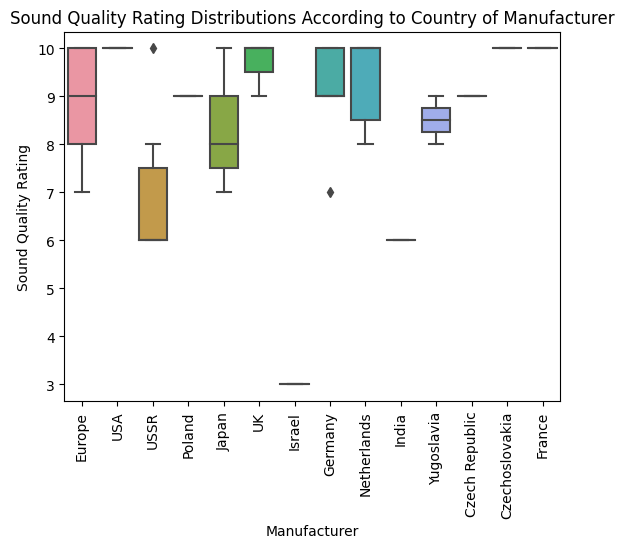

In [ ]:
plt.xticks(rotation=90)
plt.title('Sound Quality Rating Distributions According to Country of Manufacturer')
sns.boxplot(data=vinyls_df,x='Manufacturer',y='Sound Quality Rating');
# vinyls_df.query("Manufacturer == 'Yugoslavia'")['Sound Quality Rating'].value_counts()

# vinyls_df[(vinyls_df['Manufacturer'] == 'Germany') & (vinyls_df['Sound Quality Rating'] == 7)]

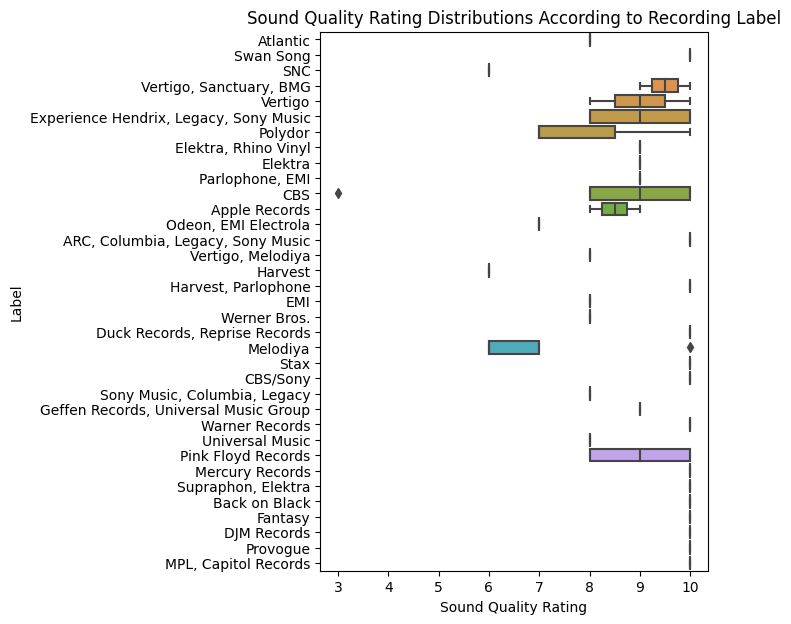

In [ ]:
plt.figure(figsize=(5,7))
plt.title('Sound Quality Rating Distributions According to Recording Label')
sns.boxplot(data=vinyls_df,y='Label',x='Sound Quality Rating');